In [1]:
import numpy as np
import pandas as pd
import random
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier

In [2]:
data = pd.read_csv("/content/drive/MyDrive/waveform_data.csv")

In [3]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [5]:
knn=KNeighborsClassifier(n_neighbors=5)

In [6]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [7]:
pred = knn.predict(X_test)

In [8]:
print("F1 score ",f1_score(y_test,pred,average='weighted'))
print("Accuracy score ",accuracy_score(y_test,pred))

F1 score  0.8246116103848947
Accuracy score  0.825


In [9]:
k=list(range(1,100))
accuracies_smote=[]
for i in k:
    c_v=cross_val_score(KNeighborsClassifier(n_neighbors=i),X=X_train,y=y_train,cv=5,scoring="accuracy")
    accuracies_smote.append(np.mean(c_v))

f_score=[]
for i in k:
    c_v=cross_val_score(KNeighborsClassifier(n_neighbors=i),X=X_train,y=y_train,cv=5,scoring="f1_weighted")
    f_score.append(np.mean(c_v))

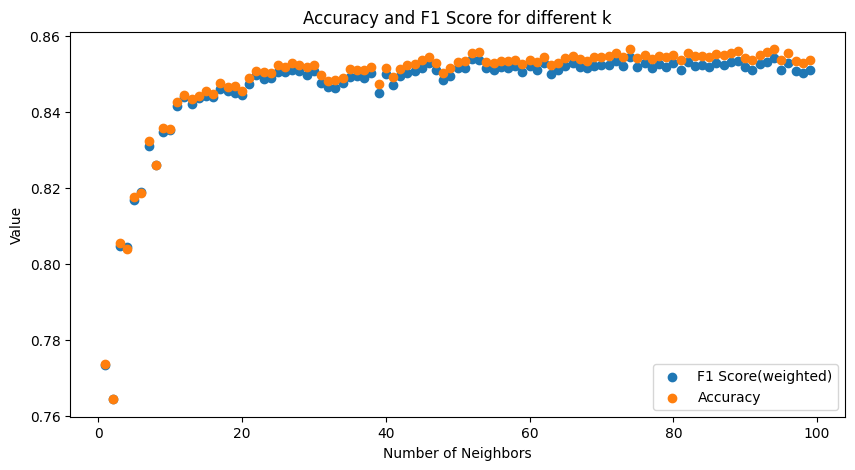

In [10]:
plt.figure(figsize=(10,5))
plt.scatter(x=list(range(1,100)),y=f_score,label='F1 Score(weighted)')
plt.scatter(x=list(range(1,100)),y=accuracies_smote,label='Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel("Value")
plt.title("Accuracy and F1 Score for different k")
plt.legend()
plt.savefig('f1_accuracy.png')

Creating imbalance by oversampling the class 2(increasing to 3000 datapoints)

In [11]:
print("Class distribution before oversampling:", Counter(y_train))
class_to_oversample = 2
ros = RandomOverSampler(sampling_strategy={class_to_oversample: 3000}, random_state=42)
X_oversampled, y_oversampled = ros.fit_resample(X_train, y_train)
print("Class distribution after oversampling:", Counter(y_oversampled))


Class distribution before oversampling: Counter({2: 1357, 0: 1325, 1: 1318})
Class distribution after oversampling: Counter({2: 3000, 0: 1325, 1: 1318})


/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (3000) in class 2 will be larger than the number of samples in the majority class (class #2 -> 1357)
  warnings.warn(


In [12]:
knn.fit(X_oversampled,y_oversampled)

KNeighborsClassifier()

In [13]:
y_pred = knn.predict(X_test)

In [14]:
print("F1 score ",f1_score(y_test,y_pred,average='weighted'))
print("Accuracy score ",accuracy_score(y_test,y_pred))

F1 score  0.8143256539055447
Accuracy score  0.816


In [15]:
k=list(range(1,100))
accuracies_smote=[]
for i in k:
    c_v=cross_val_score(KNeighborsClassifier(n_neighbors=i),X=X_oversampled,y=y_oversampled,cv=5,scoring="accuracy")
    accuracies_smote.append(np.mean(c_v))

f_score=[]
for i in k:
    c_v=cross_val_score(KNeighborsClassifier(n_neighbors=i),X=X_oversampled,y=y_oversampled,cv=5,scoring="f1_weighted")
    f_score.append(np.mean(c_v))

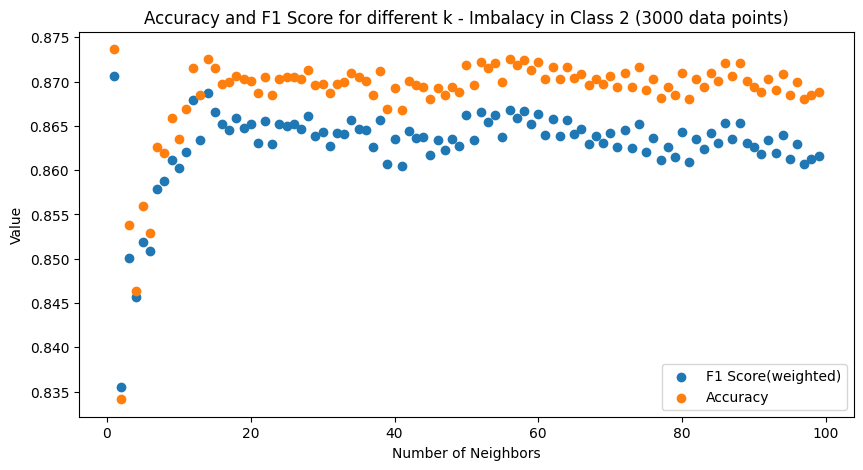

In [16]:
plt.figure(figsize=(10,5))
plt.scatter(x=list(range(1,100)),y=f_score,label='F1 Score(weighted)')
plt.scatter(x=list(range(1,100)),y=accuracies_smote,label='Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel("Value")
plt.title("Accuracy and F1 Score for different k - Imbalacy in Class 2 (3000 data points)")
plt.legend()
plt.savefig('f1_accuracy.png')

Creating imbalance by oversampling the class 2(increasing to 10000 datapoints)

In [17]:
print("Class distribution before oversampling:", Counter(y_train))
class_to_oversample = 2
ros = RandomOverSampler(sampling_strategy={class_to_oversample: 10000}, random_state=42)
X_oversampled_1, y_oversampled_1 = ros.fit_resample(X_train, y_train)
print("Class distribution after oversampling:", Counter(y_oversampled_1))


Class distribution before oversampling: Counter({2: 1357, 0: 1325, 1: 1318})
Class distribution after oversampling: Counter({2: 10000, 0: 1325, 1: 1318})


/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (10000) in class 2 will be larger than the number of samples in the majority class (class #2 -> 1357)
  warnings.warn(


In [18]:
knn.fit(X_oversampled_1,y_oversampled_1)

KNeighborsClassifier()

In [19]:
y_pred_1 = knn.predict(X_test)

In [20]:
print("F1 score ",f1_score(y_test,y_pred_1,average='weighted'))
print("Accuracy score ",accuracy_score(y_test,y_pred_1))

F1 score  0.7885247063834188
Accuracy score  0.792


In [21]:
k=list(range(1,100))
accuracies_smote=[]
for i in k:
    c_v=cross_val_score(KNeighborsClassifier(n_neighbors=i),X=X_oversampled_1,y=y_oversampled_1,cv=5,scoring="accuracy")
    accuracies_smote.append(np.mean(c_v))

f_score=[]
for i in k:
    c_v=cross_val_score(KNeighborsClassifier(n_neighbors=i),X=X_oversampled_1,y=y_oversampled_1,cv=5,scoring="f1_weighted")
    f_score.append(np.mean(c_v))

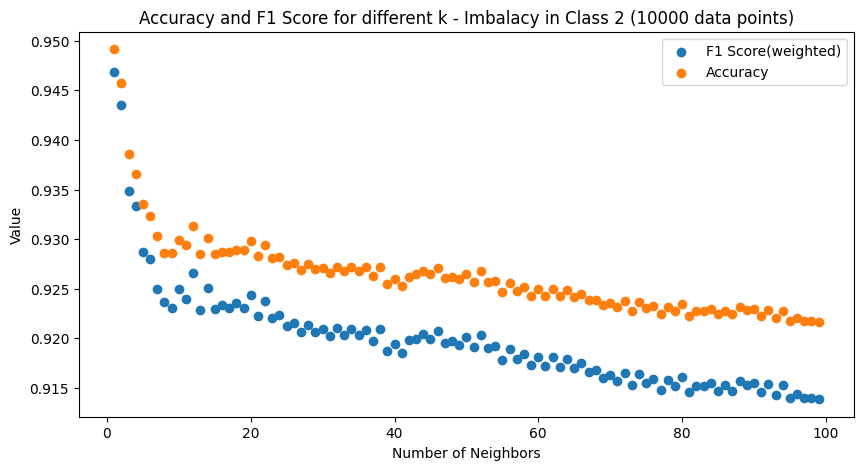

In [22]:
plt.figure(figsize=(10,5))
plt.scatter(x=list(range(1,100)),y=f_score,label='F1 Score(weighted)')
plt.scatter(x=list(range(1,100)),y=accuracies_smote,label='Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel("Value")
plt.title("Accuracy and F1 Score for different k - Imbalacy in Class 2 (10000 data points)")
plt.legend()
plt.savefig('f1_accuracy_1.png')

Creating imbalance by oversampling the class 0(increasing to 3000 datapoints)

In [23]:
print("Class distribution before oversampling:", Counter(y_train))
class_to_oversample = 0
ros = RandomOverSampler(sampling_strategy={class_to_oversample: 3000}, random_state=42)
X_oversampled_2, y_oversampled_2 = ros.fit_resample(X_train, y_train)
print("Class distribution after oversampling:", Counter(y_oversampled_2))


Class distribution before oversampling: Counter({2: 1357, 0: 1325, 1: 1318})
Class distribution after oversampling: Counter({0: 3000, 2: 1357, 1: 1318})


/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (3000) in class 0 will be larger than the number of samples in the majority class (class #2 -> 1357)
  warnings.warn(


In [24]:
knn.fit(X_oversampled_2,y_oversampled_2)

KNeighborsClassifier()

In [25]:
y_pred_2 = knn.predict(X_test)

In [26]:
print("F1 score ",f1_score(y_test,y_pred_2,average='weighted'))
print("Accuracy score ",accuracy_score(y_test,y_pred_2))

F1 score  0.8136648161369653
Accuracy score  0.813


In [27]:
k=list(range(1,100))
accuracies_smote=[]
for i in k:
    c_v=cross_val_score(KNeighborsClassifier(n_neighbors=i),X=X_oversampled_2,y=y_oversampled_2,cv=5,scoring="accuracy")
    accuracies_smote.append(np.mean(c_v))

f_score=[]
for i in k:
    c_v=cross_val_score(KNeighborsClassifier(n_neighbors=i),X=X_oversampled_2,y=y_oversampled_2,cv=5,scoring="f1_weighted")
    f_score.append(np.mean(c_v))

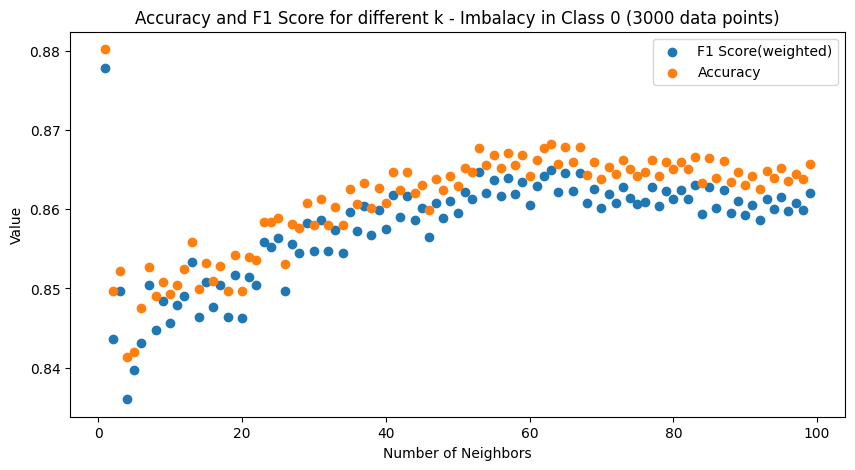

In [28]:
plt.figure(figsize=(10,5))
plt.scatter(x=list(range(1,100)),y=f_score,label='F1 Score(weighted)')
plt.scatter(x=list(range(1,100)),y=accuracies_smote,label='Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel("Value")
plt.title("Accuracy and F1 Score for different k - Imbalacy in Class 0 (3000 data points)")
plt.legend()
plt.savefig('f1_accuracy_1.png')

Creating imbalance by oversampling the class 0(increasing to 10000 datapoints)


In [29]:
print("Class distribution before oversampling:", Counter(y_train))
class_to_oversample = 0
ros = RandomOverSampler(sampling_strategy={class_to_oversample: 10000}, random_state=42)
X_oversampled_3, y_oversampled_3 = ros.fit_resample(X_train, y_train)
print("Class distribution after oversampling:", Counter(y_oversampled_3))


Class distribution before oversampling: Counter({2: 1357, 0: 1325, 1: 1318})
Class distribution after oversampling: Counter({0: 10000, 2: 1357, 1: 1318})


/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (10000) in class 0 will be larger than the number of samples in the majority class (class #2 -> 1357)
  warnings.warn(


In [30]:
knn.fit(X_oversampled_3,y_oversampled_3)

KNeighborsClassifier()

In [31]:
y_pred_3 = knn.predict(X_test)

In [32]:
print("F1 score ",f1_score(y_test,y_pred_3,average='weighted'))
print("Accuracy score ",accuracy_score(y_test,y_pred_3))

F1 score  0.786707731094306
Accuracy score  0.786


In [33]:
k=list(range(1,100))
accuracies_smote=[]
for i in k:
    c_v=cross_val_score(KNeighborsClassifier(n_neighbors=i),X=X_oversampled_3,y=y_oversampled_3,cv=5,scoring="accuracy")
    accuracies_smote.append(np.mean(c_v))

f_score=[]
for i in k:
    c_v=cross_val_score(KNeighborsClassifier(n_neighbors=i),X=X_oversampled_3,y=y_oversampled_3,cv=5,scoring="f1_weighted")
    f_score.append(np.mean(c_v))

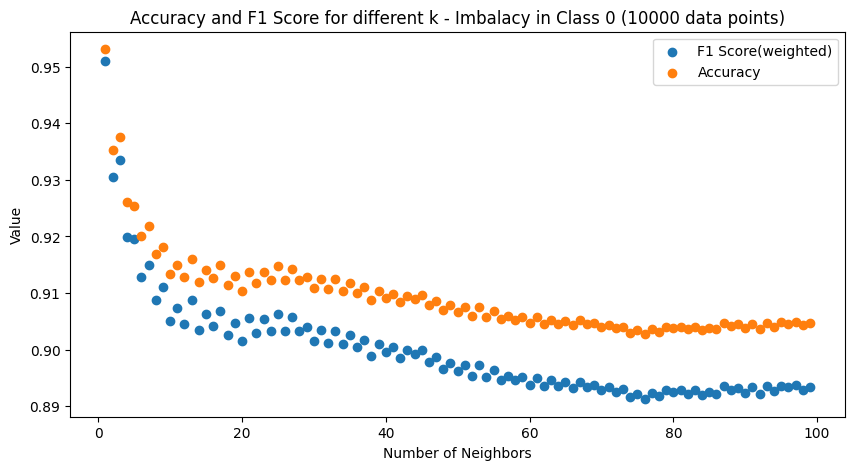

In [34]:
plt.figure(figsize=(10,5))
plt.scatter(x=list(range(1,100)),y=f_score,label='F1 Score(weighted)')
plt.scatter(x=list(range(1,100)),y=accuracies_smote,label='Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel("Value")
plt.title("Accuracy and F1 Score for different k - Imbalacy in Class 0 (10000 data points)")
plt.legend()
plt.savefig('f1_accuracy_1.png')